In [ ]:
import pandas as pd 
import seaborn as sns
from pandas._libs.tslibs.timestamps import Timestamp
import datetime
import matplotlib.pyplot as plt

In [ ]:
  # from google.colab import files
  # uploaded = files.upload()

In [ ]:
train_data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
train_data.dtypes 

ride_id             int64
seat_number        object
payment_method     object
payment_receipt    object
travel_date        object
travel_time        object
travel_from        object
travel_to          object
car_type           object
max_capacity        int64
dtype: object

In [ ]:
train_data.travel_to.value_counts(normalize = True) # the travel_from column only contains Nairobi, so it will not be useful in predictions

Nairobi    1.0
Name: travel_to, dtype: float64

In [ ]:
train_data.payment_method.value_counts(normalize = True) # the payment method column has Mpesa as over 99% of the values
#as such it will not be useful for predictions

Mpesa    0.997812
Cash     0.002188
Name: payment_method, dtype: float64

In [ ]:
train_data.payment_receipt.nunique() # each payment receipt is different, so it will not be useful for predictions

51645

In [ ]:
train_data.car_type.value_counts(normalize = True) # the car type column has only two values

Bus        0.619324
shuttle    0.380676
Name: car_type, dtype: float64

In [ ]:
train_data.travel_from.value_counts(normalize = True)

Kisii        0.437738
Migori       0.136064
Homa Bay     0.122064
Sirare       0.086146
Rongo        0.076058
Kehancha     0.036964
Awendo       0.034621
Kijauri      0.019963
Keroka       0.019131
Nyachenge    0.009914
Rodi         0.007842
Mbita        0.007319
Ndhiwa       0.004570
Sori         0.001065
Keumbu       0.000426
Oyugis       0.000097
Kendu Bay    0.000019
Name: travel_from, dtype: float64

In [ ]:
train_data[['car_type', 'max_capacity']].value_counts() # clearly the capacity is only dependent on whether you are in a bus or shuttle

car_type  max_capacity
Bus       49              31985
shuttle   11              19660
dtype: int64

In [ ]:
# count the number of passengers corresponding to each ride id
num_of_passengers = pd.DataFrame()
num_of_passengers['seats_sold'] = train_data.groupby(by = 'ride_id').count().seat_number
num_of_passengers.head()

,seats_sold
ride_id,
1442,1
5437,1
5710,1
5777,5
5778,31


In [ ]:
passengers = num_of_passengers.to_dict()['seats_sold']

In [ ]:
train_data.travel_date.nunique() # there are over 100 different travel dates

149

##Adding the Requisite Columns for the weekday, year, month, hour, and number of seats sold for each ride

In [ ]:
train_data.travel_date = pd.to_datetime(train_data.travel_date, format = "%d-%m-%y") # convert dates to datetime objects

In [ ]:
train_data.insert(5,'week_day',train_data.travel_date.apply(lambda x: x.day_name())) # extract day of week from travel date

In [ ]:
train_data.insert(5,'year',train_data.travel_date.apply(lambda x: int(Timestamp.strftime(x,'%Y')))) # extract year from travel date

In [ ]:
train_data.insert(5,'month',train_data.travel_date.apply(lambda x: int(Timestamp.strftime(x,'%m')))) # extract month from travel date

In [ ]:
# split the hour data based on : and extract the first entry which will be the hour, ex 10:15 will give 10
def split_data(row):
  return row.split(':')[0]

In [ ]:
train_data.insert(7,'hour',train_data.travel_time.apply(lambda x: int(split_data(x)))) # extract month from travel date

In [ ]:
train_data.insert(7,'is_bus',train_data.max_capacity.apply(lambda x: 1 if x == 49 else 0)) # determine if ride is in a bus or shuttle

In [ ]:
train_data.insert(12,'seats_sold',train_data.ride_id.apply(lambda x: passengers[x])) # insert num of seats sold as the outcome variable

In [ ]:
useful = ['ride_id', 'week_day','month','year', 'hour','travel_from',
          'is_bus','seats_sold']
          #removes the unnecessary parameters

## Counting Number of Seats Sold for Each Day of the Week

In [ ]:
explore = train_data[useful]
explore.week_day = explore.week_day.astype('category')
# explore.travel_from = explore.travel_from.astype('category')
# explore.car_type = explore.car_type.astype('category')
explore.week_day = pd.Categorical(explore.week_day, 
                      categories=["Sunday", "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"],
                      ordered=True)
explore.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ride_id,week_day,month,year,hour,travel_from,is_bus,seats_sold
0,1442,Tuesday,10,2017,7,Migori,1,1
1,5437,Sunday,11,2017,7,Migori,1,1
2,5710,Sunday,11,2017,7,Keroka,1,1
3,5777,Monday,11,2017,7,Homa Bay,1,5
4,5778,Monday,11,2017,7,Migori,1,31


In [ ]:
# Count number of passengers for each day of the week
by_week_day = pd.DataFrame()
by_week_day['seats_sold'] = explore.groupby(by = 'week_day').count().seats_sold

Text(0, 0.5, 'Seats Sold')

<Figure size 432x288 with 0 Axes>

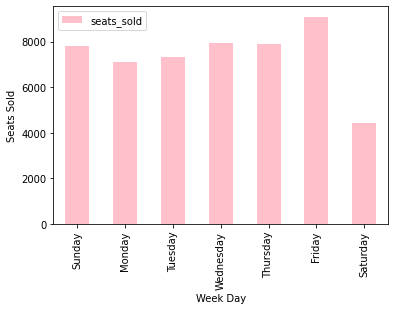

In [ ]:
# Visualization with bar plot
plt.close("all")
plt.figure()
ax = by_week_day.plot.bar(color = 'pink')
ax.set_xlabel("Week Day")
ax.set_ylabel("Seats Sold")

## Counting Number of Seats Sold for Each Car Type

In [ ]:
# Count number of passengers for each car type
by_car_type = pd.DataFrame()
by_car_type['type'] = ['shuttle','bus']
by_car_type['seats_sold'] = explore.groupby(by = 'is_bus').count().seats_sold

In [ ]:
by_car_type

,type,seats_sold
0,shuttle,19660
1,bus,31985


In [ ]:
by_car_type

,type,seats_sold
0,shuttle,19660
1,bus,31985


In [ ]:
train_data.groupby(by = 'is_bus').sum().seats_sold

is_bus
0    177056
1    715417
Name: seats_sold, dtype: int64

Text(0, 0.5, 'Seats Sold')

<Figure size 432x288 with 0 Axes>

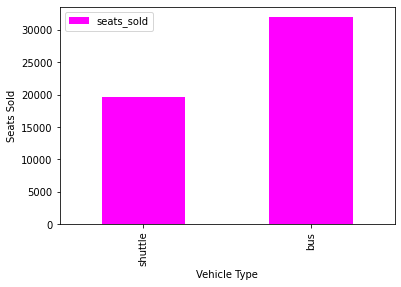

In [ ]:
# Visualization with bar plot
plt.close("all")
plt.figure()
ax = by_car_type.plot.bar(x = 'type', y = 'seats_sold',color = 'magenta')
ax.set_xlabel("Vehicle Type")
ax.set_ylabel("Seats Sold")

## ***Very*** Preliminary Linear Regression Prediction

In [ ]:
train_data.corr()

,ride_id,month,year,is_bus,hour,seats_sold,max_capacity
ride_id,1.000000,0.034532,0.059424,0.295902,0.170423,0.178823,0.295902
month,0.034532,1.000000,-0.978756,-0.149319,-0.039581,-0.047014,-0.149319
year,0.059424,-0.978756,1.000000,0.198429,0.062172,0.074952,0.198429
is_bus,0.295902,-0.149319,0.198429,1.000000,0.097581,0.524234,1.000000
hour,0.170423,-0.039581,0.062172,0.097581,1.000000,0.291701,0.097581
seats_sold,0.178823,-0.047014,0.074952,0.524234,0.291701,1.000000,0.524234
max_capacity,0.295902,-0.149319,0.198429,1.000000,0.097581,0.524234,1.000000


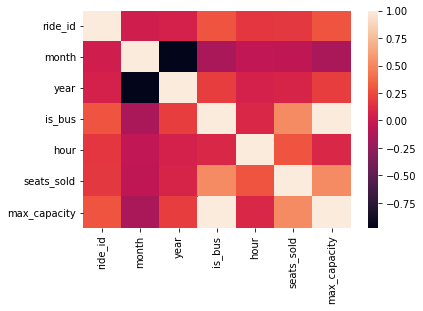

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(train_data.corr())

Text(0.5, 0, 'Parameters')

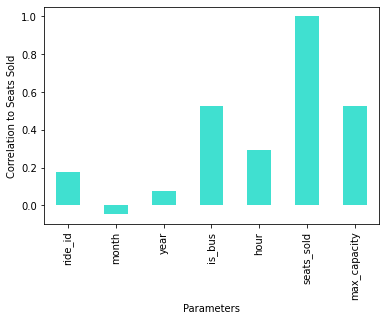

In [ ]:
ax = train_data.corr().seats_sold.plot.bar(color = 'turquoise')
ax.set_ylabel('Correlation to Seats Sold')
ax.set_xlabel('Parameters')

In [ ]:
mod = ['week_day','month',
          'hour','travel_from','is_bus','year']

In [ ]:
# create the training and testing data
from sklearn.model_selection import train_test_split
X = explore[mod]
X = pd.get_dummies(data=X, drop_first=True)
y = explore['seats_sold']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=.75)

In [ ]:
explore.head()

,ride_id,week_day,month,year,hour,travel_from,is_bus,seats_sold
0,1442,Tuesday,10,2017,7,Migori,1,1
1,5437,Sunday,11,2017,7,Migori,1,1
2,5710,Sunday,11,2017,7,Keroka,1,1
3,5777,Monday,11,2017,7,Homa Bay,1,5
4,5778,Monday,11,2017,7,Migori,1,31


In [ ]:
# # Tune the model to find the most accurate parameters
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# n_neighbors = np.arange(1,150)

# weights = ['uniform', 'distance']

# algorithm = ['ball_tree', 'kd_tree', 'brute', 'auto']

# random_grid = {'n_neighbors': n_neighbors,
#                'weights': weights,
#                'algorithm': algorithm}

#  # Use the random grid to search for best hyperparameters
# # create the base model to tune
# knn_base = KNeighborsRegressor()
# # Random search of parameters, using 4 fold cross validation
# knn_random = RandomizedSearchCV(estimator = knn_base, param_distributions = random_grid, n_iter = 10, cv = 4)
# # Fit the random search model
# knn_random.fit(X_train, y_train)
# print(knn_random.best_params_)
# # save the optimal parameters
# best_params = knn_random.best_params_

In [ ]:
# # Tune the model to find the most accurate parameters
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor
# import numpy as np
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 25, stop = 2500, num = 100)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 110, num = 22)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [25, 50, 100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
#  # Use the random grid to search for best hyperparameters
# # create the base model to tune
# rf_base = RandomForestRegressor()
# # Random search of parameters, using 4 fold cross validation
# rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = random_grid, n_iter = 40, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)
# print(rf_random.best_params_)
# # save the optimal parameters
# best_params = rf_random.best_params_

In [ ]:
# from sklearn.metrics import mean_absolute_error
# error_array = []
# from sklearn.neighbors import KNeighborsRegressor
# for i in [1,3,5,7,9]:
#   neigh = KNeighborsRegressor(n_neighbors=i)
#   neigh.fit(X_train, y_train)
#   knn_error = mean_absolute_error(y_test, neigh.predict(X_test))
#   # print(f'Mean asbolute error of {round(knn_error,2)} whereas the winning score was 3.30')
#   error_array.append(knn_error)
# error_array

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# weight_array = []
# for k in ['uniform', 'distance']:
#   neigh = KNeighborsRegressor(n_neighbors=7,weights = k)
#   neigh.fit(X_train, y_train)
#   knn_error = mean_absolute_error(y_test, neigh.predict(X_test))
#   # print(f'Mean asbolute error of {round(knn_error,2)} whereas the winning score was 3.30')
#   weight_array.append(knn_error)
# weight_array

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
neigh = KNeighborsRegressor(n_neighbors=114,weights = 'distance', algorithm = 'ball_tree')
neigh.fit(X_train, y_train)
knn_error = mean_absolute_error(y_test, neigh.predict(X_test))
print(f'Mean asbolute error of {round(knn_error,3)} whereas the winning score was 3.30')

Mean asbolute error of 4.406 whereas the winning score was 3.30


In [ ]:
import numpy as np
corr_vals = pd.DataFrame((train_data[['week_day','month',
          'hour','travel_from','is_bus','seats_sold']].corr()['seats_sold'])).sort_values(by = 'seats_sold')
corr_vals['index'] = np.arange(0,len(corr_vals))
corr_vals.head()

NameError: ignored

In [ ]:
X_test

,month,hour,is_bus,year,week_day_Monday,week_day_Tuesday,week_day_Wednesday,week_day_Thursday,week_day_Friday,week_day_Saturday,...,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
9737,12,7,1,2017,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12173,2,9,0,2018,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
42056,3,7,1,2018,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10003,2,10,0,2018,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
28405,2,7,1,2018,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38582,12,6,0,2017,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
18160,1,6,0,2018,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5679,3,8,0,2018,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13805,2,9,0,2018,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# merged = pd.DataFrame(neigh.predict(X_test), y_test)
# # plot using seaborn:
# sns.set_style('white')
# sns.set_context('talk')
# g = sns.FacetGrid(merged, hue=x2, col=x3, size=5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 650, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False) 
rf.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error
rf_error = mean_absolute_error(y_test, rf.predict(X_test))
print(f'Mean asbolute error of {round(rf_error,3)} whereas the winning score was 3.30')

Mean asbolute error of 4.374 whereas the winning score was 3.30


In [ ]:
# sns.relplot(kind = 'scatter', data = sns.plot(kind = 'scatter', ))

In [ ]:
# from sklearn.model_selection import cross_val_score
# rf_score = cross_val_score(rf, X, y,scoring="neg_mean_absolute_error", cv=5)
# print(rf_score,'\n mean = ',np.round(-1*np.mean(rf_score),3))

In [ ]:
# from sklearn.model_selection import cross_val_score
# knn_score = cross_val_score(neigh, X, y,scoring="neg_mean_absolute_error", cv=5)
# print(knn_score,'\n mean = ',np.round(-1*np.mean(knn_score),3))

In [ ]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X_train, y_train)
# reg_error =  -1 * np.mean(cross_val_score(reg, X, y,scoring="neg_mean_absolute_error", cv=10))
# print(f'Mean asbolute error of {round(reg_error,2)} whereas the winning score was 3.30')

In [ ]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor().fit(X_train, y_train)
nn_error = mean_absolute_error(y_test, regr.predict(X_test))
print(f'Mean asbolute error of {round(nn_error,2)} whereas the winning score was 3.30')

Mean asbolute error of 5.78 whereas the winning score was 3.30


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none')
clf.fit(X=X_train, y=y_train) 


KeyboardInterrupt: ignored

## Trends Sorted By Weekday, Hour, Month, and Year

1.   List item
2.   List item



In [ ]:
# The days are evenly distributed across the dataset
explore.week_day.value_counts(normalize = True)

Friday       0.176048
Wednesday    0.154032
Thursday     0.152832
Sunday       0.151399
Tuesday      0.141950
Monday       0.138077
Saturday     0.085662
Name: week_day, dtype: float64

In [ ]:
# The vast majority of entries are in the hour of 7AM, likely influenced people commuting to work
explore.hour.value_counts(normalize = True)

7     0.565495
8     0.091180
10    0.089166
19    0.084597
9     0.071488
6     0.047207
5     0.029335
11    0.012005
23    0.009527
Name: hour, dtype: float64

In [ ]:
# We can see that many more seats are sold at 7PM on average
# This is likely a result of fewer options for the night ride (7PM and 11PM) than the morning one (5-11 AM)
explore.groupby(by = 'hour').seats_sold.mean()

hour
5      7.011881
6      9.088597
7     19.516418
8     10.783394
9      9.334778
10     9.445168
11     9.129032
19    33.751659
23    15.967480
Name: seats_sold, dtype: float64

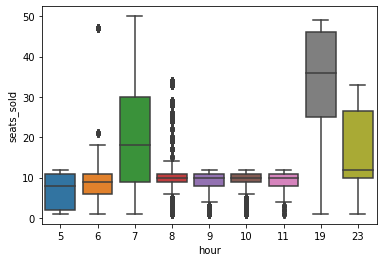

In [ ]:
# The plot further illustrates this showing that the median number of seats sold for a 7pm ride is higher than all other ride times
# It is also clear that the 8 AM ride is most impacted by outliers
import seaborn as sns
sns.boxplot(x = explore.hour,y = explore.seats_sold) 
sns.set(rc={'figure.figsize':(10,8)})

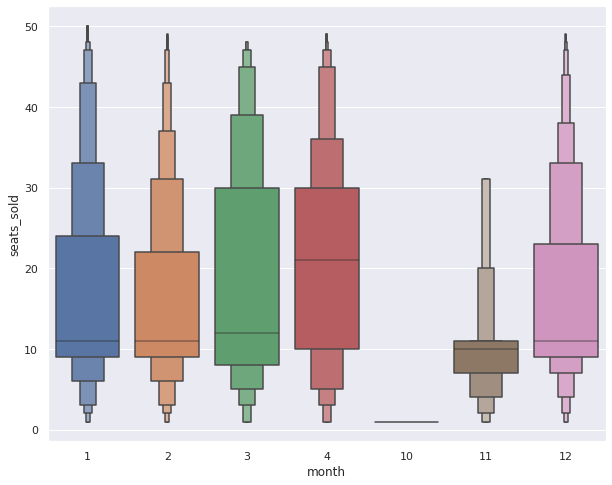

In [ ]:
# From this plot we can see the lack of entries in October, as well as how the median number of seats sold on a ride in April is much higher than all other months
sns.boxenplot(x = explore.month,y = explore.seats_sold) 
sns.set(rc={'figure.figsize':(11.7,8.27)})

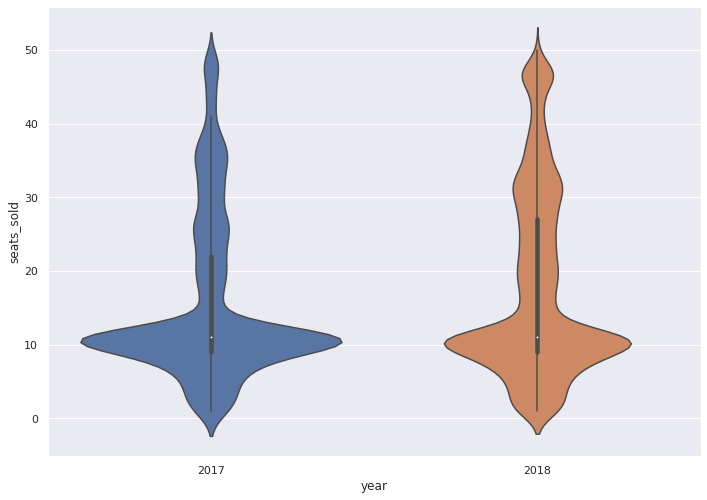

In [ ]:
# This violin plot helps to show how the entries of 2017 are highly concentrated in the 8-15 range
# On the other hand, in 2018 higher it is more common to see days with 15-50 seats sold
sns.violinplot(x = explore.year,y = explore.seats_sold) 
sns.set(rc={'figure.figsize':(10,8.27)})

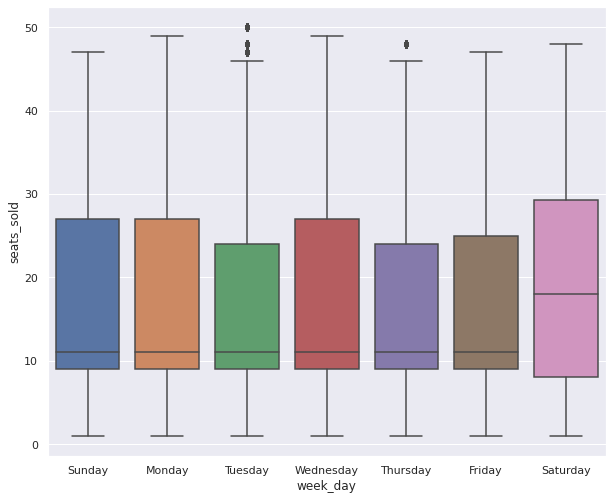

In [ ]:
# here we can see that saturday is the only day with a median number of seats sold greater than 11
sns.boxplot(x = explore.week_day,y = explore.seats_sold) 
sns.set(rc={'figure.figsize':(10,8.27)})

In [ ]:
# explore.sort_values(by = 'hour').hour.astype('category')

In [ ]:
# import seaborn as sns
# sns.relplot(x = explore.sort_values(by = 'hour').hour,y = explore.seats_sold,kind= 'scatter',color = 'green') 
# sns.set(rc={'figure.figsize':(10,8.27)})
# # 7AM and 7PM make up the majority of the travel times

In [ ]:
# pd.pivot_table(explore, values = ['seats_sold'], index = ['hour'], aggfunc = 'mean')
# we can see by hour there is little variation between 9-11, with massive peaks around 7AM, 7PM, and 11PM
# It appears as though grouping the hours into a column titled something like "late morning" would be beneficial

In [ ]:
explore.corr()

,ride_id,month,year,hour,is_bus,seats_sold
ride_id,1.000000,0.034532,0.059424,0.170423,0.295902,0.178823
month,0.034532,1.000000,-0.978756,-0.039581,-0.149319,-0.047014
year,0.059424,-0.978756,1.000000,0.062172,0.198429,0.074952
hour,0.170423,-0.039581,0.062172,1.000000,0.097581,0.291701
is_bus,0.295902,-0.149319,0.198429,0.097581,1.000000,0.524234
seats_sold,0.178823,-0.047014,0.074952,0.291701,0.524234,1.000000


In [ ]:
def late_morning(row):
  # if row['hour'] == (9) | (10) | (11):
  if [9,10,11,6].count(row['hour']) > 0:
    return "6_9"
  else:
    return row.hour



In [ ]:
# def nov_jan(row):
#   # if row['hour'] == (9) | (10) | (11):
#   if [9,10,11,6].count(row['hour']) > 0:
#     return "6_9"
#   else:
#     return row.hour

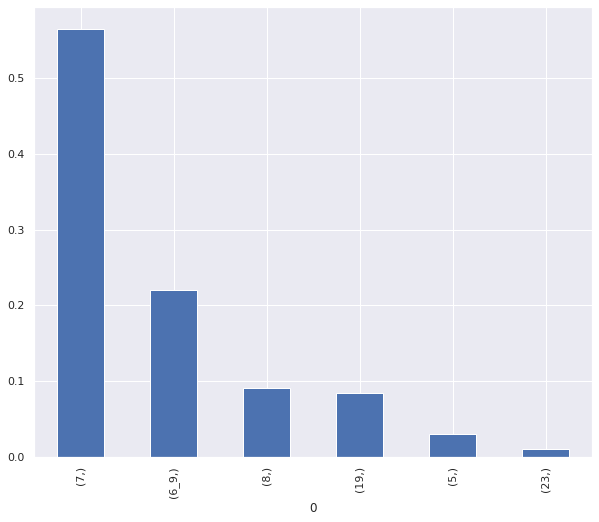

In [ ]:
pd.DataFrame(explore.apply(lambda x: late_morning(x),axis = 1)).value_counts(normalize = True).plot.bar()# categorize hours

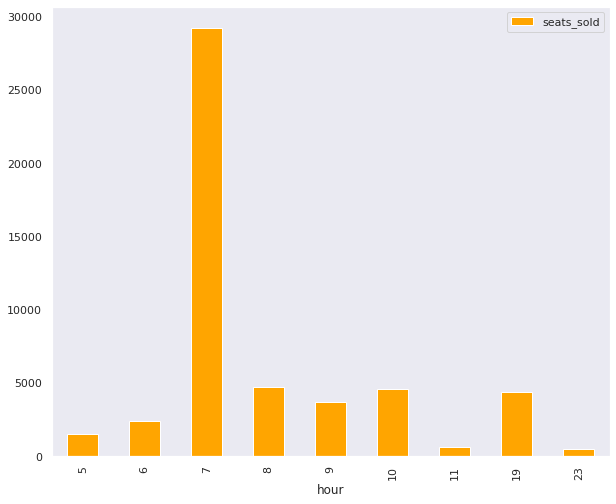

In [ ]:
# This plot helps to illustrate how 7AM makes up the vast majority of the rides
by_hour = pd.DataFrame()
by_hour['seats_sold'] = explore.groupby(by = 'hour').count().seats_sold
by_hour.plot.bar(color = 'orange')
plt.grid()

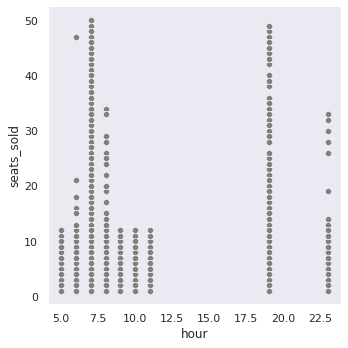

In [ ]:
import seaborn as sns
import numpy as np
sns.relplot(x = explore.sort_values(by = 'hour').hour,y = explore.seats_sold,color = 'grey') 
plt.grid()
# we can see that the months of January, April, May, June and December seem to be the most popular for travel

In [ ]:
attempt = explore.month.unique()
attempt.sort()

In [ ]:
explore.sort_values(by = 'seats_sold').mean().month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


4.961777519604996

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


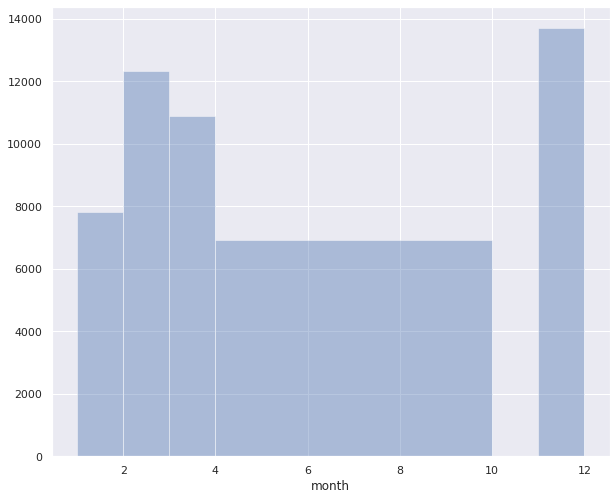

In [ ]:
sns.distplot( a=explore.month,bins = attempt, hist=True, kde=False, rug=False )

In [ ]:
import seaborn as sns
import numpy as np
# sns.relplot(x = explore.sort_values(by = 'month').month,y = explore.seats_sold,kind= 'line') 
# plt.grid()
# we can see that the months of January, April, May, June and December seem to be the most popular for travel
ax = explore.groupby(by = 'month').count().seats_sold.plot.pie(subplots = True)
ax.set_ylabel('Seats Sold')

NameError: ignored

Text(0, 0.5, 'Seats Sold')

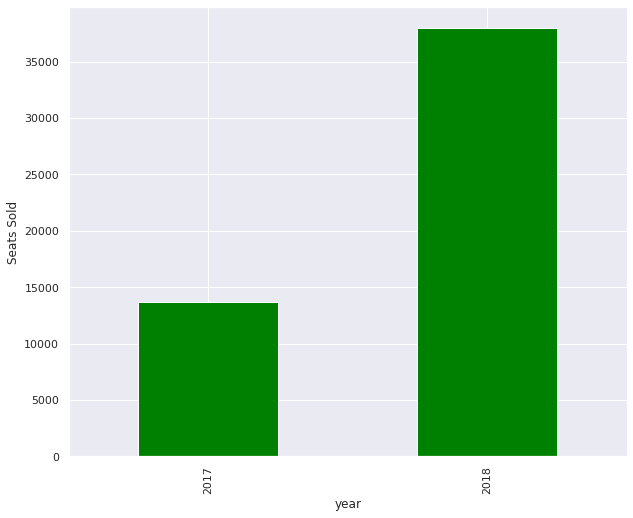

In [ ]:
# This plot helps to show how there were more seats sold in 2018 than the previous year
ax = explore.groupby(by = 'year').count().seats_sold.plot.bar(color = 'green')
ax.set_ylabel('Seats Sold')

# Counting total number of seats sold by origin city &
# Traffic Density in each city

In [ ]:
cities = pd.DataFrame()
cities = explore.groupby(by = 'travel_from').count()
new_cities = cities.drop(columns =  ['ride_id','week_day','month','year','hour','is_bus'])
new_cities.sort_values(by='seats_sold', ascending=False)

,seats_sold
travel_from,
Kisii,22607
Migori,7027
Homa Bay,6304
Sirare,4449
Rongo,3928
Kehancha,1909
Awendo,1788
Kijauri,1031
Keroka,988


In [ ]:
cities = explore.groupby(by = 'travel_from').count()
new_cities = cities.drop(columns =  ['ride_id','week_day','month','year','hour','is_bus'])
cities = explore.groupby(by = 'travel_from').nunique()
vehicles = cities.drop(columns = ['seats_sold','week_day','month','year','hour','is_bus'])
vehicles.sort_values(by='ride_id', ascending=False)

,ride_id
travel_from,
Kisii,3020
Rongo,738
Kijauri,556
Migori,386
Homa Bay,356
Keroka,312
Nyachenge,196
Sirare,191
Awendo,185


In [ ]:
# width of the bars
barWidth = 0.3
 
# Choose the height of the blue bars
bars1 = [10, 9, 2]
 
# Choose the height of the cyan bars
bars2 = [10.8, 9.5, 4.5]
 
# Choose the height of the error bars (bars1)
yer1 = [0.5, 0.4, 0.5]
 
# Choose the height of the error bars (bars2)
yer2 = [1, 0.7, 1]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='poacee')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='sorgho')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['cond_A', 'cond_B', 'cond_C'])
plt.ylabel('height')
plt.legend()
 
# Show graphic
plt.show()

